# Interrupcion Legal de Embarazo CDMX

### Vista general de datos

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 50)
embarazo = pd.read_csv("/Users/iboa08/Desktop/ML/interrupcion-legal-del-embarazo.csv", engine="python")        


### Mini limpieza de datos

In [2]:
embarazoTest = embarazo

embarazoTest = embarazoTest.drop("AUTOREF", axis=1)
embarazoTest = embarazoTest.drop("H_FINGRESO", axis=1)
embarazoTest = embarazoTest.drop("P_CONSENT", axis=1)
embarazoTest = embarazoTest.drop("PARENTEZCO", axis=1)
embarazoTest = embarazoTest.drop("MENARCA", axis=1)
embarazoTest = embarazoTest.drop("FSEXUAL", axis=1)
embarazoTest = embarazoTest.drop("SEMEMB", axis=1)
embarazoTest = embarazoTest.drop("GESTA", axis=1)
embarazoTest = embarazoTest.drop("NABORTO", axis=1)
embarazoTest = embarazoTest.drop("NPARTOS", axis=1)
embarazoTest = embarazoTest.drop("NCESAREA", axis=1)
embarazoTest = embarazoTest.drop("C_NUM", axis=1)
embarazoTest = embarazoTest.drop("P_SEMGEST", axis=1)
embarazoTest = embarazoTest.drop("P_DIASGESTA", axis=1)
embarazoTest = embarazoTest.drop("PROCILE", axis=1)
embarazoTest = embarazoTest.drop("S_COMPLICA", axis=1)
embarazoTest = embarazoTest.drop("PANTICONCEP", axis=1)
embarazoTest = embarazoTest.drop("DESC_SERVICIO", axis=1)
embarazoTest = embarazoTest.drop("MOTILES", axis=1)
embarazoTest = embarazoTest.drop("ANTICONCEPTIVO", axis=1)
embarazoTest = embarazoTest.drop("CONSEJERIA", axis=1)

embarazoTest['OCUPACION'] = embarazoTest.OCUPACION.fillna('No se dijo')
embarazoTest['NILE'] = embarazoTest.NILE.fillna(0)
dict = {"preparatoria completa": "PREPACOM", "secundaria completa": "SECCOM",
       "licenciatura completa": "LICCOM", "primaria completa": "PRIMCOM", 
       "preparatoria incompleta": "PREPINC", "licenciatura incompleta": "LICINC",
       "secundaria incompleta": "SECINC", "ninguno": "NINGUNO"}
embarazoTest = embarazoTest.replace({"NIVEL_EDU": dict})
dict = {"Obrera": "Otro", "Secrataria": "Otro",
       "Cajera": "Otro", "Enfermera": "Otro", 
       "Cocinera": "Otro", "Recepcionista": "Otro",
       "Dentista": "Otro", "Abogada": "Otro",
       "Artista": "Otro","Contadora": "Otro",
       "Textil": "Otro","Periodista o Publicista": "Otro",
       "Administradora": "Otro","Ejecutiva": "Otro",
       "Capturista": "Otro","Voluntaria o Trabajadora Social": "Otro","Trabajadora Sexual": "Otro",
       "Vetarinaria": "Otro","Telefonista": "Otro","Arquitecta": "Otro","Fisioterapeuta": "Otro",
        "Constructura o Elecetricista": "Otro","Ingeniera": "Otro",
       "Bibliotecaria": "Otro","Chofer": "Otro","Asesora financiera": "Otro","Auditora": "Otro",
       "Recursos Humanos": "Otro","Polic�a o Seguridad": "Otro","Modelo": "Otro",
       "Log�stica o Eventos": "Otro","Dise�adora": "Otro","Fot�grafa": "Otro","M�dico": "Otro",
       "Psic�loga": "Otro","Nuti�loga": "Otro","Asesora jur�dica": "Otro","Inform�tica o Tecnolog�a": "Otro",
       "Constructora o Elecetricista": "Otro","Mec�nica": "Otro","Trabajadora de campo": "Otro",
        "Cient�fica": "Otro","Param�dico": "Otro","Trabajadora del Sector P�blico": "SectorPublico",
       "Profesora o Educadora": "Otro","Estilista": "Otro","Trabajadora del Hogar": "Otro",
       "Secretaria": "Otro"}
embarazoTest = embarazoTest.replace({"OCUPACION": dict})
embarazoTest['ALC O MUNICIPIO'].value_counts()

iztapalapa                 6623
gustavo a madero           5096
venustiano carranza        3028
ecatepec de morelos        2913
�lvaro obreg�n             2491
cuauht�moc                 2429
nezahualc�yotl             2257
azcapotzalco               2020
iztacalco                  1750
mighel hidalgo             1567
tl�huac                    1401
tlalpan                    1327
coyoac�n                   1300
xochimilco                 1242
Iztapalapa                 1153
chimalhuac�n               1070
tlalnepantla de baz        1031
Gustavo A. Madero           887
ixtapaluca                  782
benito ju�rez               661
chalco                      650
Venustiano Carranza         545
Ecatepec de Morelos         520
tec�mac                     517
tultitl�n                   515
                           ... 
ocosingo                      1
P�tzcuaro                     1
yanga                         1
Mexicali                      1
calcahualco                   1
playa vi

### Explicación limpieza

En la celda anterior se trata de limpiar los datos de una manera que sea útil para su uso dentro de esta libreta. Despúes de haber consultado el diccionario de que significa los nombres de las columnas, se opto por quitar ciertas columnas dignas no necesarias para nuestro proyecto, lo cual reduce la cantidad de atributos totales. Despues se analizó si hay valores faltantes dentro de nuestros datos y se hizo una imputación de los datos, en este caso se hizo la suposición de que dentro de la columna de número de abortos previos, los valores NaN no han tenido un aborto anterior, lo cual se replazo con un 0. Para la columna de ocupación, se creo un nuevo atributo donde en vez de no tener un valor, se aplico el valor de no se dijo. Despues de haber hecho la imputación, se modificaron los datos para agrupar ciertos valores con otros, de esta manera será más fácil de manejar despues.

### Cantidad de abortos por mes

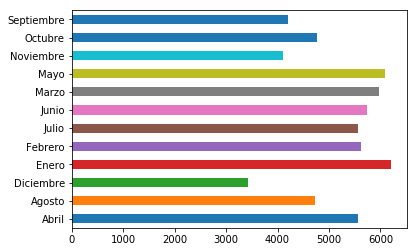

In [86]:
embarazoTest['MES'].value_counts().sort_index().plot.barh()

### Cantidad abortos por mes y edad

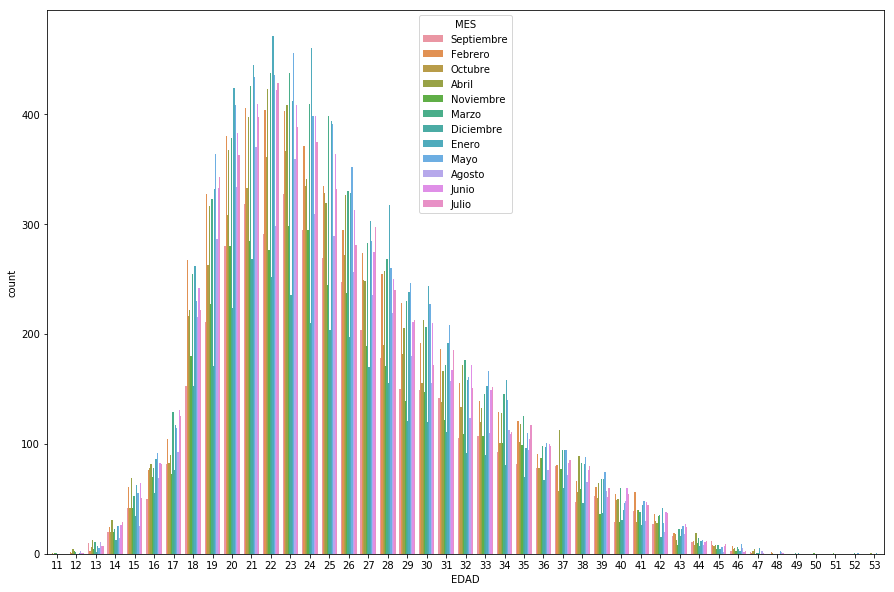

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="MES", data=embarazoTest)

### Cantidad de abortos por mes por hospital

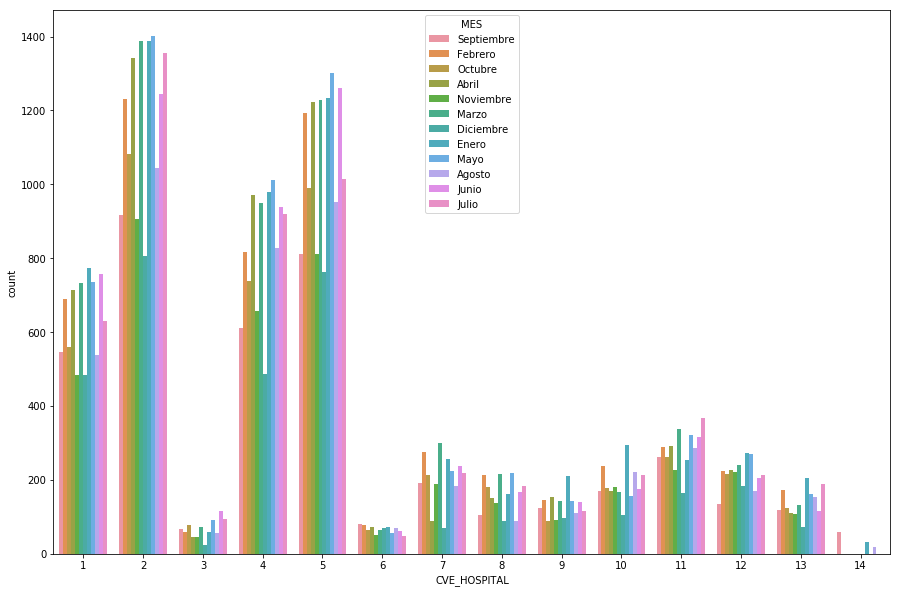

In [28]:
#embarazo['OCUPACION'].value_counts().sort_index().plot.bar()
plt.figure(figsize=(15, 10))
sns.countplot(x="CVE_HOSPITAL", hue="MES", data=embarazoTest)

### Cantidad de abortos anteriores por edad

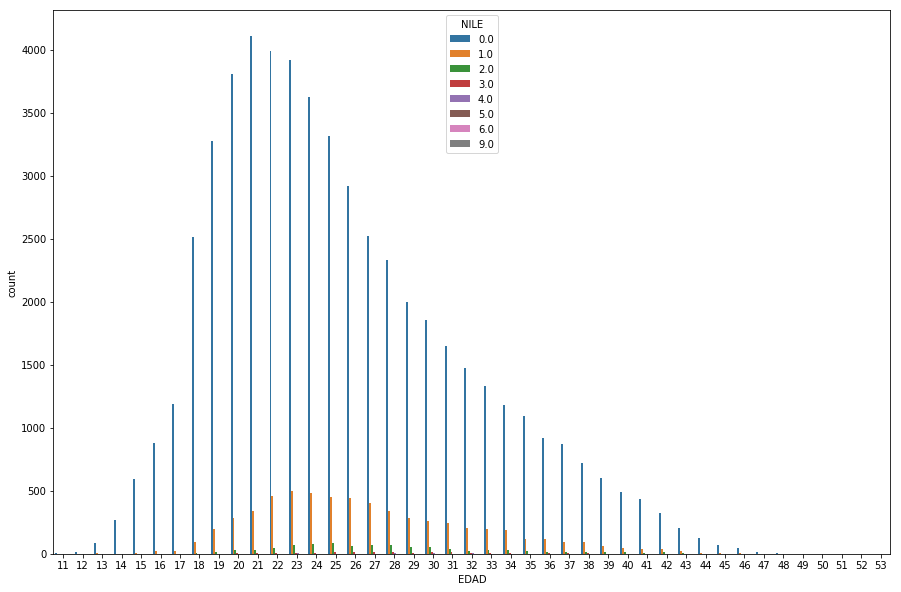

In [55]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="NILE", data=embarazoTest)

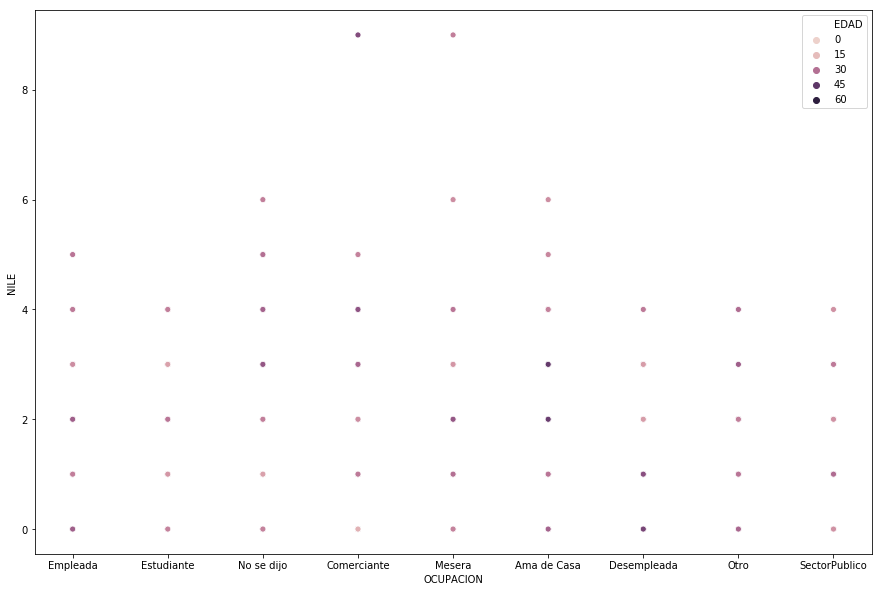

In [10]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='OCUPACION',y='NILE', hue='EDAD',data=embarazoTest)